In [13]:
"""aihwkit example 10: plotting of presets.

Plot the step response of different preset devices and preset configurations.
"""
# pylint: disable=invalid-name

import matplotlib.pyplot as plt

from aihwkit.utils.visualization import (
    plot_device,
    plot_device_symmetry,
    plot_pulse_response,
    plot_model_programming_error,
    plot_response_overview,
    plot_weight_drift,
)

from aihwkit.simulator.presets import (
    ReRamSBPresetDevice,
    ReRamESPresetDevice,
    CapacitorPresetDevice,
    EcRamPresetDevice,
    IdealizedPresetDevice,
    EcRamMOPresetDevice,
    PCMPresetUnitCell,
    PCMPresetDevice,
)

In [3]:
plt.ion()

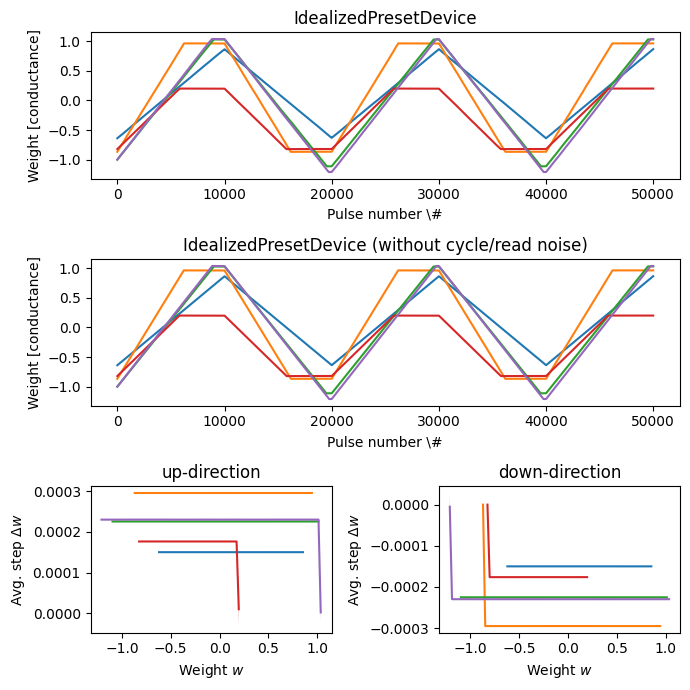

In [4]:
# Idealized
plot_device(IdealizedPresetDevice(), n_steps=10000)

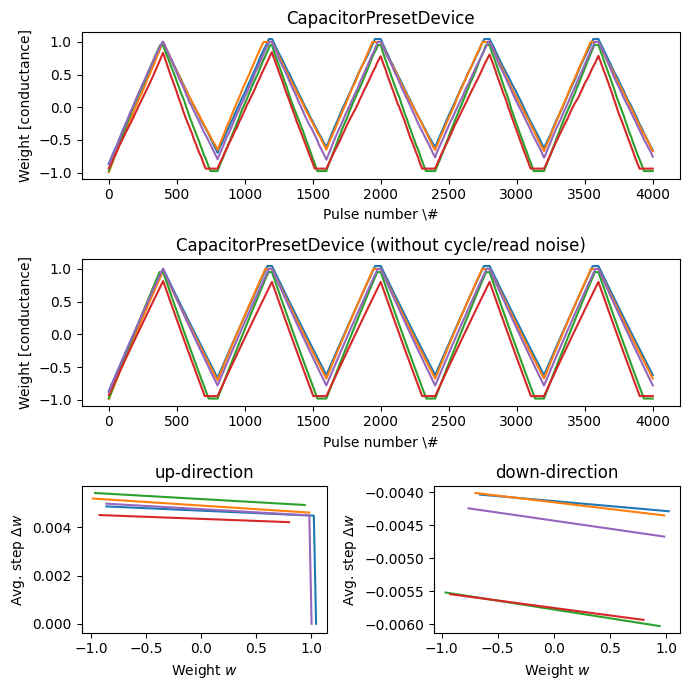

In [5]:
# Capacitor
plot_device(CapacitorPresetDevice(), n_steps=400)

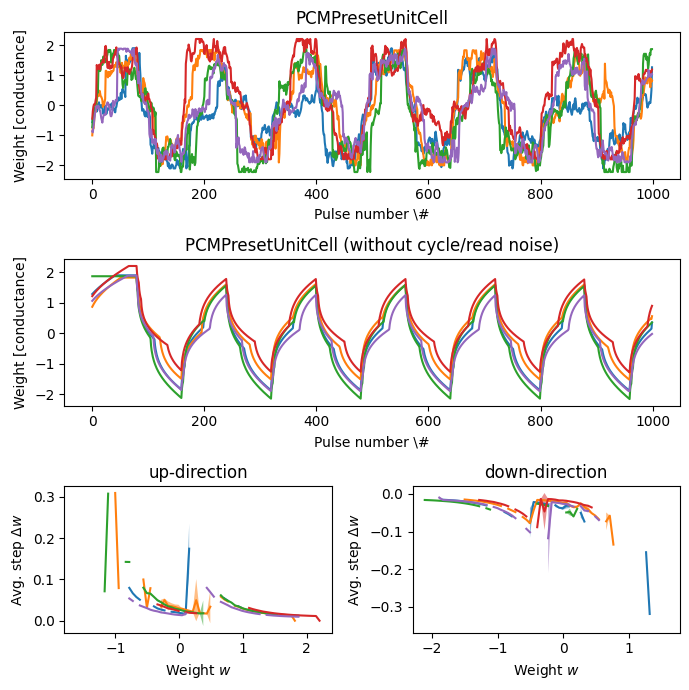

In [6]:
# PCM
plot_device(PCMPresetUnitCell(), n_steps=80)

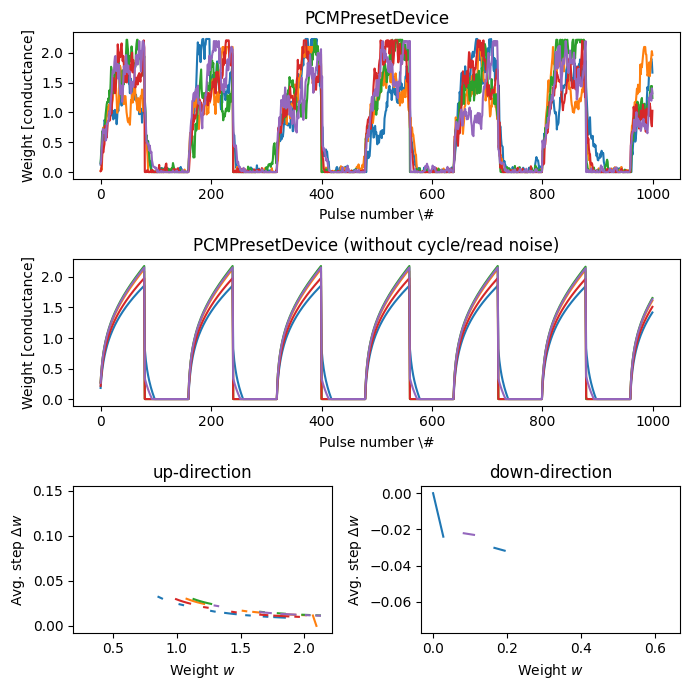

In [9]:
plot_device(PCMPresetDevice(), n_steps=80)

#### custom rpu config

In [14]:
# aihwkit related methods
from aihwkit.simulator.configs import (
    InferenceRPUConfig,
    WeightNoiseType,
    WeightClipType,
    WeightModifierType,
)
# from aihwkit.inference import PCMLikeNoiseModel, GlobalDriftCompensation
from aihwkit.nn.conversion import convert_to_analog
from aihwkit.simulator.presets.devices import PCMPresetDevice
from aihwkit.simulator.presets.compounds import PCMPresetUnitCell
from aihwkit_test.customized_noise_pcm import TestNoiseModel

rpu_config = InferenceRPUConfig()
# rpu_config.device = PCMPresetDevice()       # change to paired PCM devices (Gp-Gm)
rpu_config.device = PCMPresetUnitCell() 
rpu_config.noise_model = TestNoiseModel()   # change to customized noise model
rpu_config.drift_compensation = None
rpu_config.forward.is_perfect=True

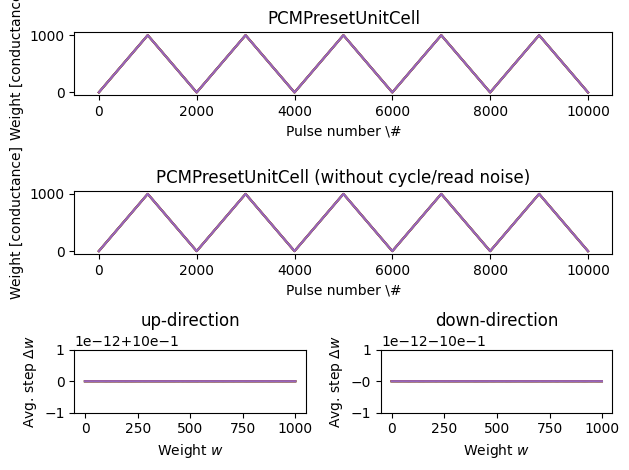

In [24]:
plot_response_overview(rpu_config) 

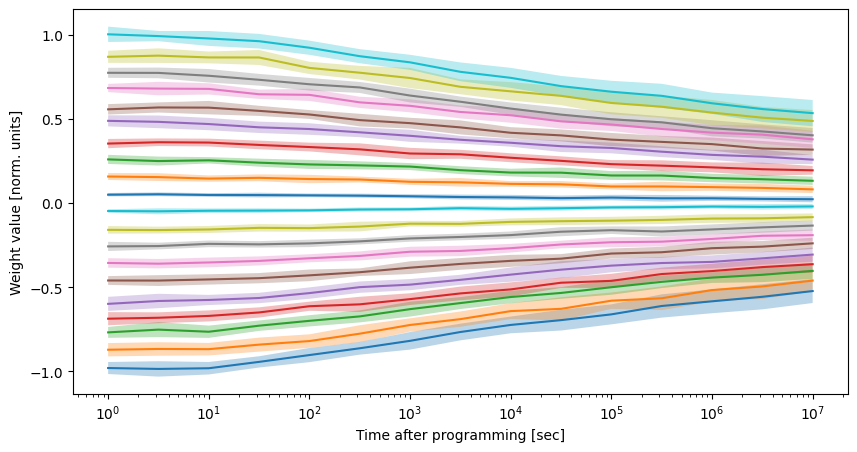

In [34]:
import numpy as np

plot_weight_drift(w_inits=np.linspace(-1.0, 1.0, 20))

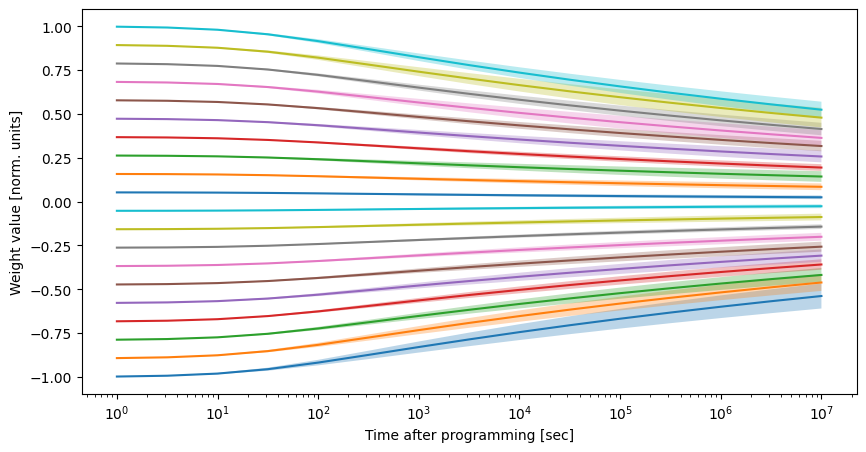

In [36]:
plot_weight_drift(noise_model=TestNoiseModel(), w_inits=np.linspace(-1.0, 1.0, 20))
# log

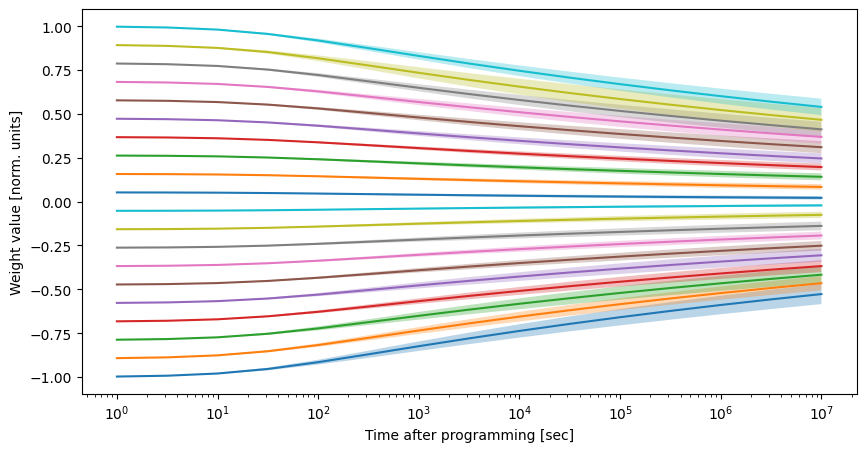

In [37]:
plot_weight_drift(noise_model=TestNoiseModel(), w_inits=np.linspace(-1.0, 1.0, 20))
# const 0.01

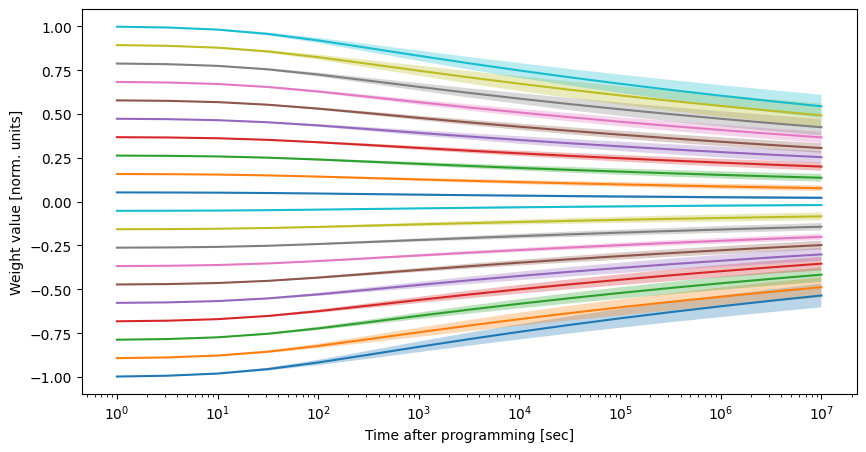

In [38]:
plot_weight_drift(noise_model=TestNoiseModel(), w_inits=np.linspace(-1.0, 1.0, 20))
# const 0.1

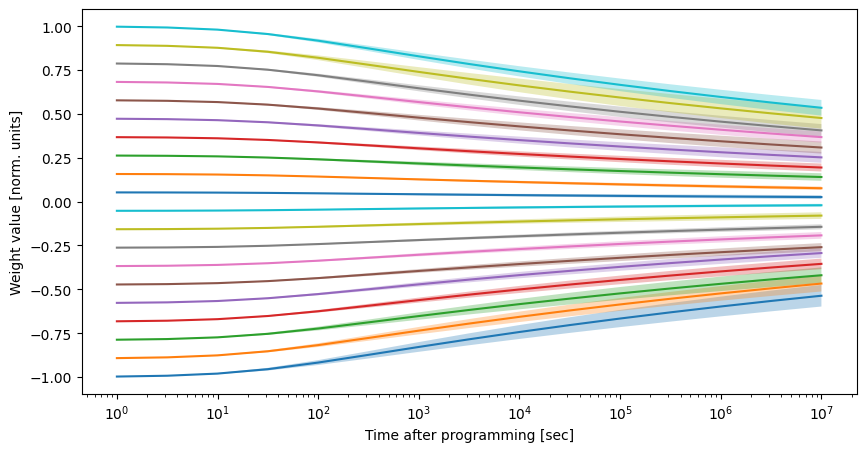

In [40]:
from visualization_sy import plot_weight_drift_sy

plot_weight_drift_sy(noise_model=TestNoiseModel(), w_inits=np.linspace(-1.0, 1.0, 20))
# const 0.1